### Item 1

Simulate random reactangular matriz

In [1]:
import numpy as np

# Define dimensions of the matrix
num_rows=5
num_cols=8

# Create random matrix
random_matrix=np.random.randint(0,100,size=(num_rows,num_cols))
print(random_matrix)

# Find rank and trace of the matrix 
rank=np.linalg.matrix_rank(random_matrix)
trace=np.trace(random_matrix)
print(f'The rank of the matrix is {rank} and the trace is {trace}')

# Since the random matrix is rectangular, then I calculate AA' to get a squere matrix
transpose_mtx=np.transpose(random_matrix)

#Multiply de original matrix by its transpose
result_AAT=np.dot(random_matrix,transpose_mtx)
  
# Find determinant of matrix
det=np.linalg.det(result_AAT)
print(f'The determinant of the matrix result_AAT is {det}')
print('                       ')
# The inverse of matrix only exist for squere matrix. Then I find invert of AAT
inv=np.linalg.inv(result_AAT)
print(f'The invert of the matrix result_AAT is:')
print(inv)
print('                       ')

# Find transpose by original matrix
result_ATA=np.dot(transpose_mtx,random_matrix)

# Find eigenvlaues and eigenvectos of AAT
eigenval_AAT, eigenvec_AAT = np.linalg.eig(result_AAT)

# Find eigenvlaues and eigenvectos of ATA
eigenval_ATA, eigenvec_ATA = np.linalg.eig(result_ATA)
print('                       ')
print('Eigenvalues AAT')
print(eigenval_AAT)
print('Eigenvalues ATA')
print(eigenval_ATA)
print('                       ')
print('Eigenvectors AAT')
print(eigenvec_AAT)
print('Eigenvectors ATA')
print(eigenvec_ATA)

[[31 53 13 83  9 17 80 67]
 [35 14 17 65 46 59 86 75]
 [ 1 90 19 11 13  7 72 85]
 [98 37 28 50 93 93 51 59]
 [93 95  7 20 39  5 89 32]]
The rank of the matrix is 5 and the trace is 153
The determinant of the matrix result_AAT is 3.034813614769336e+19
                       
The invert of the matrix result_AAT is:
[[ 5.43516264e-04 -5.17069675e-04 -4.90248252e-05  2.15961388e-04
  -1.91737254e-04]
 [-5.17069675e-04  7.55972365e-04 -8.83965230e-05 -3.80688075e-04
   2.52113371e-04]
 [-4.90248252e-05 -8.83965230e-05  1.84669238e-04  7.55418850e-05
  -9.54894144e-05]
 [ 2.15961388e-04 -3.80688075e-04  7.55418850e-05  2.61443039e-04
  -1.76460607e-04]
 [-1.91737254e-04  2.52113371e-04 -9.54894144e-05 -1.76460607e-04
   2.17264973e-04]]
                       
                       
Eigenvalues AAT
[106687.40064121  14755.59100623   8758.87906775    684.71912521
   3214.4101596 ]
Eigenvalues ATA
[ 1.06687401e+05+0.00000000e+00j  1.47555910e+04+0.00000000e+00j
  8.75887907e+03+0.00000000e+00

AA' has 5 eigenvalues and A'A has 8 eigenvalues, of which 3 are zero and the others 5 are the same values of AA'. This indicates that the eigenvalues of the two matrices are equal. Additionally, the number of eigenvectors of each matrix is equal to the number of eigenvalues, in the case of the matrix A'A yields complex numbers with the imaginary part different from zero but corresponding to the eigenvalues that are almost zero.

### Item 2
Picture exercise

Pixels 600 x 600


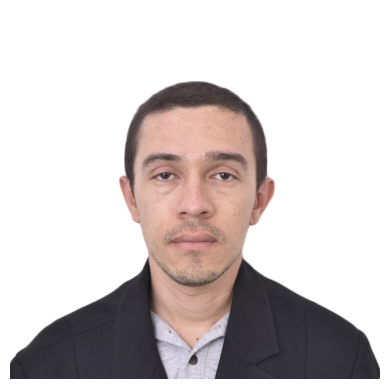

In [22]:
from PIL import Image
import matplotlib.pyplot as plt
import requests
from io import BytesIO
import numpy as np


image_er=Image.open('Fotos/edwar_ramirez.jpg')

#Get current dimensions of image
width, height = image_er.size
print(f'Pixels {height} x {width}')

# Display the grayscale image using matplotlib
plt.imshow(image_er)
plt.axis('off')  # Turn off the axis labels and ticks
plt.show()


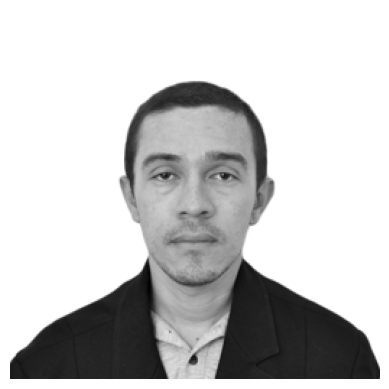

In [20]:
#Chage Size of image
new_size=(256,256)
resized_image = image_er.resize(new_size)

# Convert the resized image to grayscale
grayscale_image = resized_image.convert('L')

# Save the grayscale image
grayscale_image.save('grayscale_image_er.jpg') 

# Display the grayscale image using matplotlib
plt.imshow(grayscale_image, cmap='gray')
plt.axis('off')  # Turn off the axis labels and ticks
plt.show()

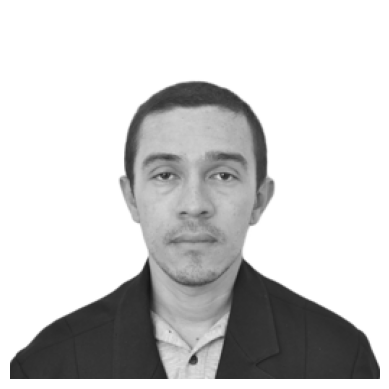

In [23]:
list_er_image=[]
for y in range(256):
    row_pixels = [grayscale_image.getpixel((x, y)) for x in range(256)]
    list_er_image.append(row_pixels)

matrix_er= np.array(list_er_image)

# Create an image from the matrix
image_face_er = Image.fromarray(matrix_er)

# Display the grayscale image of average face using matplotlib
plt.imshow(image_face_er)
plt.axis('off')  # Turn off the axis labels and ticks
plt.show()

In [25]:
import os

folder_path = "Fotos" 

# Get a list of all files in the folder
file_list = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

# Get the number of files
number_of_files = len(file_list)

print("Number of files in the folder:", number_of_files)
file_list

Number of files in the folder: 20


['Alvaro Gomez.jpg',
 'Ana Estefania Henao.jpg',
 'Andres Felipe Orrego.jpg',
 'Daniel Acosta.jpg',
 'edward_giraldo.jpg',
 'edwar_ramirez.jpg',
 'Fernando_Franco.jpg',
 'FOTO TIP.jpg',
 'Foto1.jpg',
 'Foto2.jpeg',
 'fotoesp.jpg',
 'Foto_MAH.jpg',
 'jessica.jpeg',
 'Juan José Gil Hoyos.jpg',
 'Mauricio.jpg',
 'Sebastian_Torres.jpeg',
 'Sebastián Giraldo Zuluaga.jpg',
 'Vanessa_256x256_grises.jpeg',
 'Viviana_256x256_grises.jpeg',
 'WhatsApp Image 2023-09-02 at 11.35.34 AM.jpeg']

In [26]:
# Browse by original pictures, transform to grayscale and get pixels
dictpixels={}
Folder='Fotos/'
new_size=(256,256)
first_pic = 0

for picture in file_list:
    picture_path = Folder + picture
    image=Image.open(picture_path)
    resized_image = image.resize(new_size)
    grayscale_image = resized_image.convert('L')

    for y in range(256):
        row_pixels = [grayscale_image.getpixel((x, y)) for x in range(256)]

        if first_pic==0:
            listrow=[]
            listrow.append(row_pixels)
            dictpixels['row' + str(y)] = listrow
            #dictpixels.append(listrow)
            
        else:
            listrow = dictpixels['row' + str(y)]
            #listrow=dictpixels[y]
            listrow.append(row_pixels)
            dictpixels['row' + str(y)] = listrow
            #dictpixels.append(listrow)

    first_pic = 1


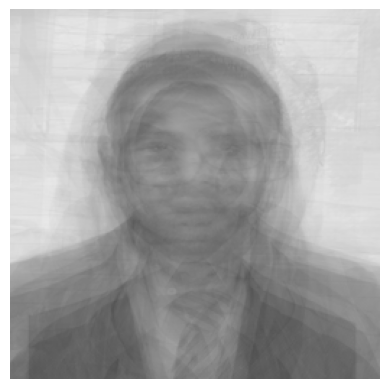

In [27]:
listimage=[]
for y in range(256):
    rowy=dictpixels['row' + str(y)]
    matrix_rowy = np.array(rowy)
    average_rowy = np.mean(matrix_rowy,axis=0)
    listimage.append(average_rowy)

matrix_avg_face=np.array(listimage)

# Create an image from the matrix
image_avg_face = Image.fromarray(matrix_avg_face)

# Display the grayscale image of average face using matplotlib
plt.imshow(image_avg_face)
plt.axis('off')  # Turn off the axis labels and ticks
plt.show()


In [28]:
Eucli_distance = np.linalg.norm(matrix_er - matrix_avg_face)
print(f'Euclidean distance: {Eucli_distance}')

Manha_distance = np.sum(np.abs(matrix_er - matrix_avg_face))
print(f'Manhattan distance: {Manha_distance}')

Euclidean distance: 17636.53431792936
Manhattan distance: 3994616.1500000004


In this case, the Euclidean distance and the Manhatan distance were applied to measure the distance between two matrices. Another way can be to calculate the error with respect to the base image which would be the average image.